# Data Importing and Preparation

In [527]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np
from numpy import array
from numpy import asarray
from numpy import zeros

In [528]:
data = pd.read_csv("dataset.csv")
data

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1
...,...,...,...,...,...
6417101,99910,Puzzle Pirates,I really ove this game but it needs somethings...,-1,0
6417102,99910,Puzzle Pirates,"Used to play Puzzel Pirates 'way back when', b...",-1,0
6417103,99910,Puzzle Pirates,"This game was aright, though a bit annoying. W...",-1,0
6417104,99910,Puzzle Pirates,"I had a nice review to recommend this game, bu...",-1,0


In [529]:
data.isnull().sum().sort_values(ascending=False)

app_name        183234
review_text       7305
app_id               0
review_score         0
review_votes         0
dtype: int64

In [530]:
data = data.dropna(subset=["review_text"])

In [531]:
data.isnull().sum().sort_values(ascending=False)

app_name        183073
app_id               0
review_text          0
review_score         0
review_votes         0
dtype: int64

In [532]:
data["app_id"].nunique()

9972

In [533]:
# drop duplicate reviews
data = data.drop_duplicates("review_text")

In [534]:
games_list = pd.read_csv("games-features.csv")
games_list.head()

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,79,...,,,English French German Italian Spanish,http://www.dayofdefeat.com/,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
3,40,40,Deathmatch Classic,Deathmatch Classic,Jun 1 2001,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
4,50,50,Half-Life: Opposing Force,Half-Life: Opposing Force,Nov 1 1999,0,0,1,0,0,...,,,English French German Korean,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,


In [535]:
games_list["QueryID"].nunique()

13304

In [536]:
print(games_list.isnull().sum().sort_values(ascending=False))

SupportEmail         2
LegalNotice          1
SupportURL           1
QueryName            1
CategoryVRSupport    0
                    ..
PlatformWindows      0
SubscriptionAvail    0
PurchaseAvail        0
FreeVerAvail         0
MacRecReqsText       0
Length: 78, dtype: int64


In [537]:
print(data.isnull().sum().sort_values(ascending=False))

app_name        130075
app_id               0
review_text          0
review_score         0
review_votes         0
dtype: int64


In [538]:
data = pd.merge(data,games_list[["QueryID","IsFree","GenreIsAction","GenreIsAdventure","GenreIsRPG","GenreIsSimulation","GenreIsStrategy","GenreIsSports","GenreIsRacing","Metacritic"]],left_on="app_id", right_on="QueryID")
data

,app_id,app_name,review_text,review_score,review_votes,QueryID,IsFree,GenreIsAction,GenreIsAdventure,GenreIsRPG,GenreIsSimulation,GenreIsStrategy,GenreIsSports,GenreIsRacing,Metacritic
0,10,Counter-Strike,Ruined my life.,1,0,10,False,True,False,False,False,False,False,False,88
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1,10,False,True,False,False,False,False,False,False,88
2,10,Counter-Strike,This game saved my virginity.,1,0,10,False,True,False,False,False,False,False,False,88
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0,10,False,True,False,False,False,False,False,False,88
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1,10,False,True,False,False,False,False,False,False,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565948,99910,Puzzle Pirates,I really ove this game but it needs somethings...,-1,0,99910,True,False,True,False,False,True,False,False,0
4565949,99910,Puzzle Pirates,"Used to play Puzzel Pirates 'way back when', b...",-1,0,99910,True,False,True,False,False,True,False,False,0
4565950,99910,Puzzle Pirates,"This game was aright, though a bit annoying. W...",-1,0,99910,True,False,True,False,False,True,False,False,0
4565951,99910,Puzzle Pirates,"I had a nice review to recommend this game, bu...",-1,0,99910,True,False,True,False,False,True,False,False,0


<AxesSubplot:ylabel='Frequency'>

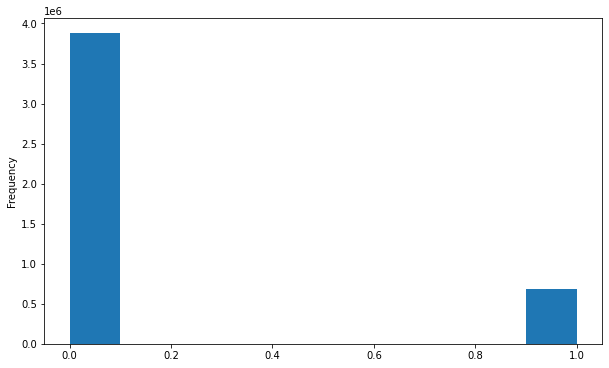

In [539]:
data["review_votes"].plot.hist()

In [540]:
data["review_score"] = data["review_score"].replace([-1],0)
data = data.replace([True],1)
data = data.replace([False],0)
data[data["review_score"] != 1].head()

,app_id,app_name,review_text,review_score,review_votes,QueryID,IsFree,GenreIsAction,GenreIsAdventure,GenreIsRPG,GenreIsSimulation,GenreIsStrategy,GenreIsSports,GenreIsRacing,Metacritic
2970,10,Counter-Strike,"You are 14 years old, first time trying to pla...",0,1,10,0,1,0,0,0,0,0,0,88
3291,10,Counter-Strike,Game full of cheaters nice valve.,0,0,10,0,1,0,0,0,0,0,0,88
3839,10,Counter-Strike,"Eh, its alright",0,0,10,0,1,0,0,0,0,0,0,88
3931,10,Counter-Strike,full of russians,0,1,10,0,1,0,0,0,0,0,0,88
3932,10,Counter-Strike,"Best Game, I dont recommend it though, very hi...",0,1,10,0,1,0,0,0,0,0,0,88


In [541]:
data['totalwords'] = [len(x.split()) for x in data['review_text'].tolist()]

In [542]:
data.head(3)

,app_id,app_name,review_text,review_score,review_votes,QueryID,IsFree,GenreIsAction,GenreIsAdventure,GenreIsRPG,GenreIsSimulation,GenreIsStrategy,GenreIsSports,GenreIsRacing,Metacritic,totalwords
0,10,Counter-Strike,Ruined my life.,1,0,10,0,1,0,0,0,0,0,0,88,3
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1,10,0,1,0,0,0,0,0,0,88,449
2,10,Counter-Strike,This game saved my virginity.,1,0,10,0,1,0,0,0,0,0,0,88,5


In [543]:
data = data[data["totalwords"]> 50]

In [544]:
grouped = data.groupby("app_name").sum().reset_index().sort_values("review_score", ascending=False)
grouped

,app_name,app_id,review_score,review_votes,QueryID,IsFree,GenreIsAction,GenreIsAdventure,GenreIsRPG,GenreIsSimulation,GenreIsStrategy,GenreIsSports,GenreIsRacing,Metacritic,totalwords
6992,Terraria,1844198400,16984,1738,1844198400,0,17464,17464,17464,0,0,0,0,1449512,2195903
7782,Undertale,5932222540,14375,1860,5932222540,0,0,0,15151,0,0,0,0,1393892,2321303
2592,Fallout: New Vegas,275542560,11376,1372,275542560,0,12312,0,12312,0,0,0,0,1034208,1867486
8023,Warframe,2780587880,10398,1476,2780587880,12068,12068,0,0,0,0,0,0,820624,2028898
5314,Portal 2,6321520,10028,786,6321520,0,10196,10196,0,0,0,0,0,968620,1135816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,Radial Impact,775780,0,1,775780,0,0,0,0,0,0,0,0,0,650
1952,Demolition Master 3D,577420,0,1,577420,0,0,0,0,2,0,0,0,0,187
1987,Destructamundo,323020,0,1,323020,0,0,0,0,0,0,0,0,0,272
2038,Diorama Battle of NINJA,464070,0,1,464070,0,1,0,0,0,0,0,0,0,418


In [545]:
data = data[(data.GenreIsAction != 0) | (data.GenreIsAdventure != 0) | (data.GenreIsRPG != 0) | (data.GenreIsRacing != 0) | (data.GenreIsSimulation != 0) | (data.GenreIsSports != 0) | (data.GenreIsStrategy != 0)]
data

,app_id,app_name,review_text,review_score,review_votes,QueryID,IsFree,GenreIsAction,GenreIsAdventure,GenreIsRPG,GenreIsSimulation,GenreIsStrategy,GenreIsSports,GenreIsRacing,Metacritic,totalwords
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1,10,0,1,0,0,0,0,0,0,88,449
8,10,Counter-Strike,"Counter-Strike: Ok, after 9 years of unlimited...",1,1,10,0,1,0,0,0,0,0,0,88,174
13,10,Counter-Strike,CS is one of the greatest and undermined games...,1,1,10,0,1,0,0,0,0,0,0,88,683
23,10,Counter-Strike,Blame this game for the rise of the online mul...,1,1,10,0,1,0,0,0,0,0,0,88,65
28,10,Counter-Strike,Update to my review with some shameless adve...,1,1,10,0,1,0,0,0,0,0,0,88,323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565948,99910,Puzzle Pirates,I really ove this game but it needs somethings...,0,0,99910,1,0,1,0,0,1,0,0,0,104
4565949,99910,Puzzle Pirates,"Used to play Puzzel Pirates 'way back when', b...",0,0,99910,1,0,1,0,0,1,0,0,0,86
4565950,99910,Puzzle Pirates,"This game was aright, though a bit annoying. W...",0,0,99910,1,0,1,0,0,1,0,0,0,57
4565951,99910,Puzzle Pirates,"I had a nice review to recommend this game, bu...",0,0,99910,1,0,1,0,0,1,0,0,0,62


In [546]:
filtered_list = pd.DataFrame()

In [547]:
filtered_list = filtered_list.append(grouped[grouped["GenreIsAction"]>0].head(10))

In [548]:
filtered_list = filtered_list.append(grouped[grouped["GenreIsAdventure"]>0].head(10))

In [549]:
filtered_list = filtered_list.append(grouped[grouped["GenreIsRPG"]>0].head(10))

In [550]:
filtered_list = filtered_list.append(grouped[grouped["GenreIsSimulation"]>0].head(10))

In [551]:
filtered_list = filtered_list.append(grouped[grouped["GenreIsStrategy"]>0].head(10))

In [552]:
filtered_list = filtered_list.append(grouped[grouped["GenreIsSports"]>0].head(10))

In [553]:
filtered_list = filtered_list.append(grouped[grouped["GenreIsRacing"]>0].head(10))

In [554]:
filtered_list = filtered_list.drop_duplicates()
filtered_list.shape

(50, 15)

In [555]:
filter = data["review_text"] != ""
data = data[filter]

In [556]:
filtered_data = data[data["app_name"].isin(filtered_list.app_name.array)]
filtered_data.groupby("app_name").nunique().shape

(50, 15)

In [557]:
# select random sample of 1500 reviews per title
ftop_data = []
for item in filtered_data["app_id"].unique():
    ftop_data.append(filtered_data[filtered_data["app_id"] == item].sample(n=1500, replace=True))

In [558]:
ftop_data = pd.concat(ftop_data, ignore_index=True)

In [559]:
negatives = data[data["review_score"]==0].sample(n=37500)
postives = data[data["review_score"]==1].sample(n=37500)

In [560]:
ftop_reviews = negatives.append(postives)

(array([37500.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 37500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

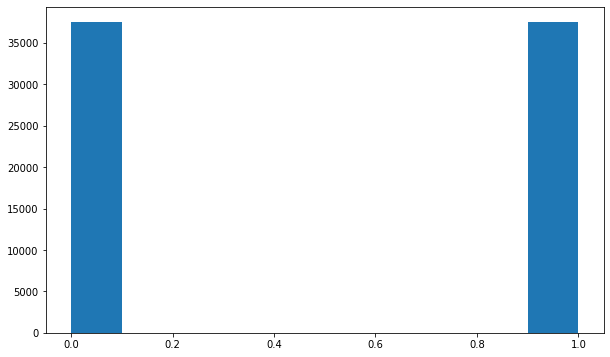

In [561]:
plt.hist(ftop_reviews.review_score)

In [562]:
data_ml = ftop_data.filter(items=["review_text","GenreIsAction","GenreIsAdventure","GenreIsRPG","GenreIsSimulation","GenreIsStrategy","GenreIsSports","GenreIsRacing"], axis=1)
data_sa = ftop_reviews.filter(items=["review_text","review_score"], axis=1)

In [563]:
genre_labels = data_ml[["GenreIsAction","GenreIsAdventure","GenreIsRPG","GenreIsSimulation","GenreIsStrategy","GenreIsSports","GenreIsRacing"]]
genre_labels.head()

,GenreIsAction,GenreIsAdventure,GenreIsRPG,GenreIsSimulation,GenreIsStrategy,GenreIsSports,GenreIsRacing
0,1,1,1,0,0,0,0
1,1,1,1,0,0,0,0
2,1,1,1,0,0,0,0
3,1,1,1,0,0,0,0
4,1,1,1,0,0,0,0


In [564]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [565]:
def preprocess(nsen):
    # remove punctuation and numerical values
    sentence = re.sub("[^a-zA-Z]"," ", nsen)
    # remove individual characters
    sentence = re.sub(r"\s+[a-zA-Z]\s+", " ", sentence)
    # remove urls
    sentence = re.sub(r'http\S+', '', sentence)
    # remove the word game and games
    sentence = re.sub(r"\bgame\b"," ", sentence)
    sentence = re.sub(r"\bgames\b"," ", sentence)
    # remove stopwords from text
    sentence = ' '.join(word for word in sentence.split() if word not in stopwords) 
    # remove extra white space
    sentence = re.sub(r"\s+"," ", sentence)

    return sentence

# Data Exploration

<AxesSubplot:>

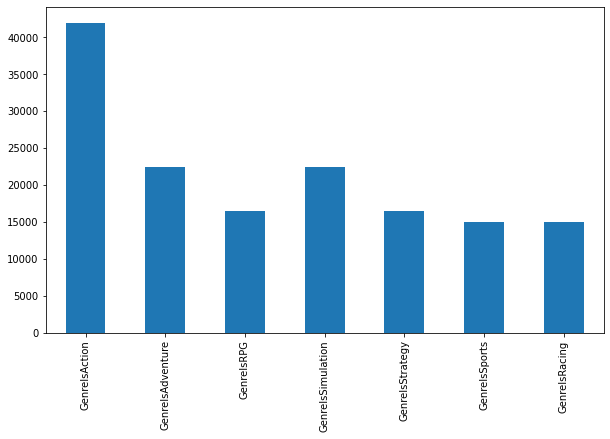

In [566]:
plt.rcParams["figure.figsize"][0] = 10
plt.rcParams["figure.figsize"][1] = 6
genre_labels.sum(axis=0).plot.bar()

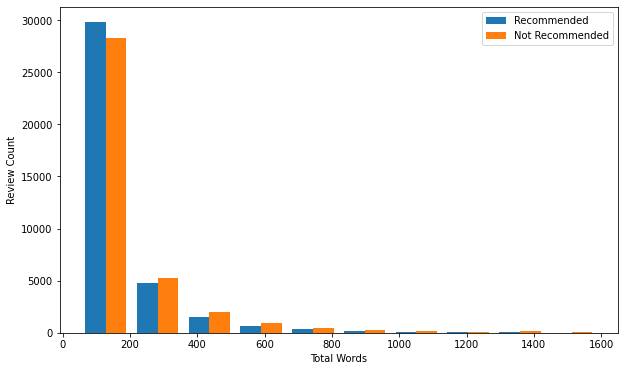

In [567]:
# plot distribution of review length
plt.hist([ftop_reviews.totalwords[ftop_reviews.review_score==1],ftop_reviews.totalwords[ftop_reviews.review_score==0]])
plt.xlabel('Total Words')
plt.ylabel('Review Count')
plt.legend(['Recommended', 'Not Recommended'])

In [568]:
# create cleaned sets for exploration
cdata_ml = data_ml
cdata_ml["review_text"] = cdata_ml["review_text"].apply(preprocess)
cdata_sa = data_sa
cdata_sa["review_text"] = cdata_sa["review_text"].apply(preprocess)

Text(0, 0.5, 'Review Count')

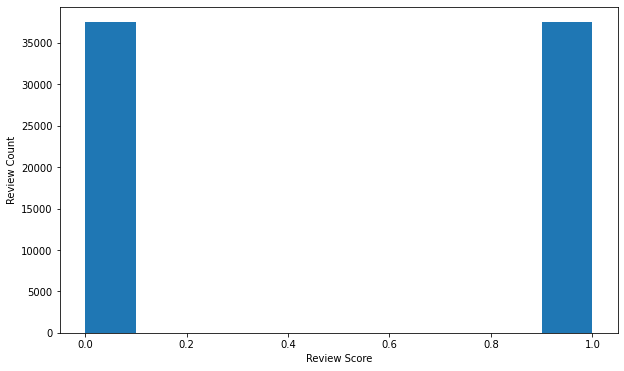

In [569]:
plt.hist(cdata_sa["review_score"])
plt.xlabel('Review Score')
plt.ylabel('Review Count')

In [570]:
from sklearn.feature_extraction.text import CountVectorizer

feel like 3728
total war 3646
single player 2722
open world 2320
feels like 2133
long time 2095
highly recommend 2009
fun play 1984
really good 1917
want play 1645
dark souls 1572
best played 1525
real life 1512
voice acting 1503
tomb raider 1496
really fun 1454
pretty good 1428
dlc dlc 1368
mario kart 1336
play friends 1320


<AxesSubplot:xlabel='review_text'>

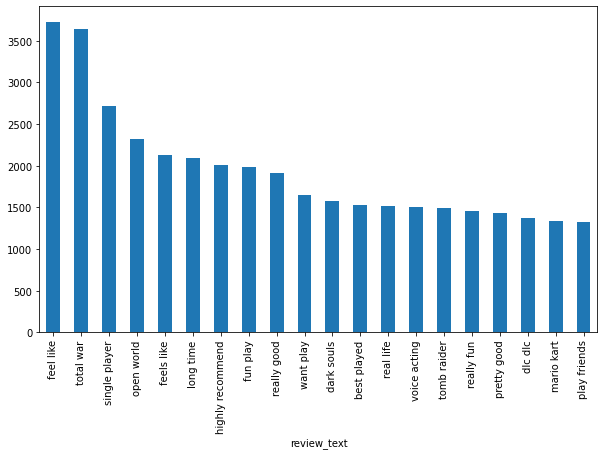

In [571]:
def top_n(corpus, n=None, m=1):
    vectorizer = CountVectorizer(ngram_range=(m,m), stop_words = 'english').fit(corpus)
    bag_of_w = vectorizer.transform(corpus)
    words_sum = bag_of_w.sum(axis=0) 
    freq_w = [(word, words_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    freq_w = sorted(freq_w, key = lambda x: x[1], reverse=True)
    return freq_w[:n]

pop_words = top_n(cdata_ml['review_text'], 20, 2)
for word, frequency in pop_words:
    print(word, frequency)
pop_wdf = pd.DataFrame(pop_words, columns = ['review_text' , 'count'])
pop_wdf.groupby('review_text').sum()['count'].sort_values(ascending=False).plot(kind='bar')

# Multilabel Classification

In [572]:
X = []
reviews = list(data_ml["review_text"])
for sentence in reviews:
    X.append(preprocess(sentence))
y = genre_labels.values

## Multilabel Classification Base Model

In [573]:
from sklearn.model_selection import train_test_split

In [574]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=333)

In [575]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [576]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_len = len(tokenizer.word_index) + 1

maxlen = 250
embedding_dim = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [577]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import LSTM, SpatialDropout1D, InputLayer, BatchNormalization, Dropout, Bidirectional
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.layers.embeddings import Embedding

In [578]:
b_model = Sequential()
b_model.add(Embedding(vocab_len, embedding_dim, input_length=X_train.shape[1]))
b_model.add(SpatialDropout1D(0.2))
b_model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
b_model.add(BatchNormalization())
b_model.add(Dropout(0.2))
b_model.add(Dense(7, activation='sigmoid'))
b_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["categorical_accuracy"])

epochs = 50
batch_size = 128

b_history = b_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])

Epoch 1/50
370/370 [==============================] - 554s 1s/step - loss: 0.4623 - categorical_accuracy: 0.4503 - val_loss: 0.2310 - val_categorical_accuracy: 0.6429
Epoch 2/50
370/370 [==============================] - 496s 1s/step - loss: 0.1723 - categorical_accuracy: 0.5361 - val_loss: 0.1594 - val_categorical_accuracy: 0.4928
Epoch 3/50
370/370 [==============================] - 507s 1s/step - loss: 0.1382 - categorical_accuracy: 0.5269 - val_loss: 0.1420 - val_categorical_accuracy: 0.5246
Epoch 4/50
370/370 [==============================] - 503s 1s/step - loss: 0.1176 - categorical_accuracy: 0.5237 - val_loss: 0.1431 - val_categorical_accuracy: 0.4794
Epoch 5/50
370/370 [==============================] - 502s 1s/step - loss: 0.1046 - categorical_accuracy: 0.5206 - val_loss: 0.1322 - val_categorical_accuracy: 0.4952
Epoch 6/50
370/370 [==============================] - 503s 1s/step - loss: 0.0981 - categorical_accuracy: 0.5439 - val_loss: 0.1325 - val_categorical_accuracy: 0.505

In [579]:
b_model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 250, 100)          7029500   
_________________________________________________________________
spatial_dropout1d_21 (Spatia (None, 250, 100)          0         
_________________________________________________________________
bidirectional_21 (Bidirectio (None, 128)               84480     
_________________________________________________________________
batch_normalization_21 (Batc (None, 128)               512       
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 7)                 903       
Total params: 7,115,395
Trainable params: 7,115,139
Non-trainable params: 256
_________________________________________

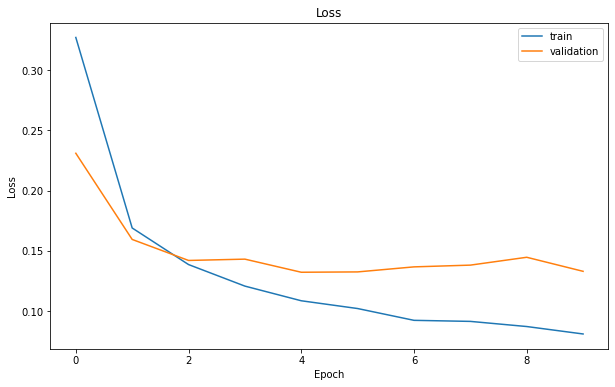

In [580]:
plt.title('Loss')
plt.plot(b_history.history['loss'], label='train')
plt.plot(b_history.history['val_loss'], label='validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

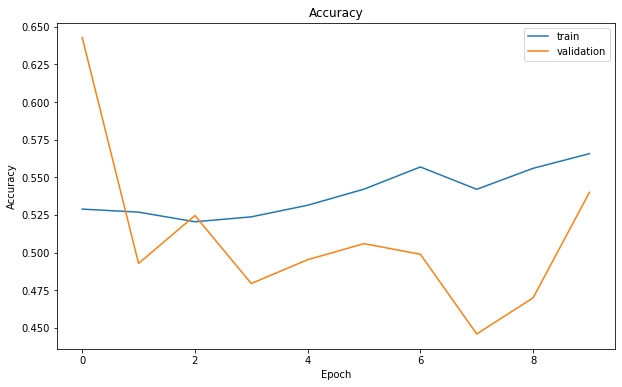

In [581]:
plt.title('Accuracy')
plt.plot(b_history.history['categorical_accuracy'], label='train')
plt.plot(b_history.history['val_categorical_accuracy'], label='validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [582]:
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix

In [583]:
b_preds = b_model.predict(X_test)

In [662]:
b_preds_rounded = b_preds.round()
b_preds_rounded[123]

array([0., 0., 0., 1., 0., 1., 1.], dtype=float32)

In [663]:
y_test[123]

1

In [586]:
from sklearn.metrics import hamming_loss

In [587]:
# b_preds = np.argmax(gl_preds, axis=1)
print('Hamming loss is ', hamming_loss(y_test, b_preds.round()))
b_report = classification_report(y_test, b_preds.round())
print(b_report)

Hamming loss is  0.047104761904761906
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     12617
           1       0.93      0.86      0.89      6802
           2       0.89      0.84      0.87      4978
           3       0.93      0.91      0.92      6725
           4       0.92      0.89      0.90      4902
           5       0.95      0.93      0.94      4511
           6       0.95      0.92      0.93      4540

   micro avg       0.93      0.90      0.92     45075
   macro avg       0.93      0.90      0.91     45075
weighted avg       0.93      0.90      0.92     45075
 samples avg       0.92      0.91      0.90     45075



C:\Users\Asad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Multilabel Classification Using GloVe Embeddings

In [588]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=333)

In [589]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_len = len(tokenizer.word_index) + 1

maxlen = 250

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [590]:
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(52500, 250) (52500, 7)
(22500, 250) (22500, 7)


In [591]:
embedding_dict = dict()
embedding_dim = 100

glove_input_file = open('glove.twitter.27B.100d.txt', encoding="utf8")

for item in glove_input_file:
    items = item.split(' ')
    word = items[0]
    coeff = asarray(items[1:], dtype='float32')
    embedding_dict[word] = coeff
glove_input_file.close()

embedding_matrix = zeros((vocab_len, embedding_dim))
for word, index in tokenizer.word_index.items():
    embedding_vec = embedding_dict.get(word)
    if embedding_vec is not None:
        embedding_matrix[index] = embedding_vec

In [592]:
gl_model = Sequential()
gl_model.add(Embedding(vocab_len, embedding_dim, weights=[embedding_matrix], input_length=X_train.shape[1]))
gl_model.add(SpatialDropout1D(0.2))
gl_model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
gl_model.add(BatchNormalization())
gl_model.add(Dropout(0.2))
gl_model.add(Dense(7, activation='sigmoid'))
gl_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["categorical_accuracy"])

epochs = 50
batch_size = 128

gl_history = gl_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])

Epoch 1/50
370/370 [==============================] - 542s 1s/step - loss: 0.6136 - categorical_accuracy: 0.3356 - val_loss: 0.3068 - val_categorical_accuracy: 0.5973
Epoch 2/50
370/370 [==============================] - 509s 1s/step - loss: 0.3060 - categorical_accuracy: 0.5767 - val_loss: 0.1872 - val_categorical_accuracy: 0.5175
Epoch 3/50
370/370 [==============================] - 514s 1s/step - loss: 0.2092 - categorical_accuracy: 0.5685 - val_loss: 0.1499 - val_categorical_accuracy: 0.5461
Epoch 4/50
370/370 [==============================] - 509s 1s/step - loss: 0.1671 - categorical_accuracy: 0.5839 - val_loss: 0.1296 - val_categorical_accuracy: 0.5922
Epoch 5/50
370/370 [==============================] - 509s 1s/step - loss: 0.1486 - categorical_accuracy: 0.5782 - val_loss: 0.1221 - val_categorical_accuracy: 0.5404
Epoch 6/50
370/370 [==============================] - 509s 1s/step - loss: 0.1343 - categorical_accuracy: 0.5898 - val_loss: 0.1193 - val_categorical_accuracy: 0.571

In [593]:
gl_model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 250, 100)          7029500   
_________________________________________________________________
spatial_dropout1d_22 (Spatia (None, 250, 100)          0         
_________________________________________________________________
bidirectional_22 (Bidirectio (None, 128)               84480     
_________________________________________________________________
batch_normalization_22 (Batc (None, 128)               512       
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 7)                 903       
Total params: 7,115,395
Trainable params: 7,115,139
Non-trainable params: 256
_________________________________________

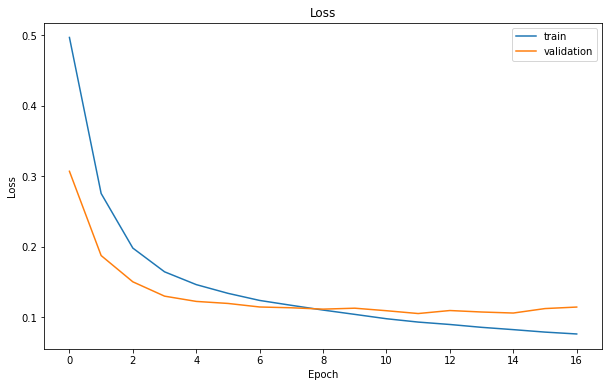

In [594]:
plt.title('Loss')
plt.plot(gl_history.history['loss'], label='train')
plt.plot(gl_history.history['val_loss'], label='validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

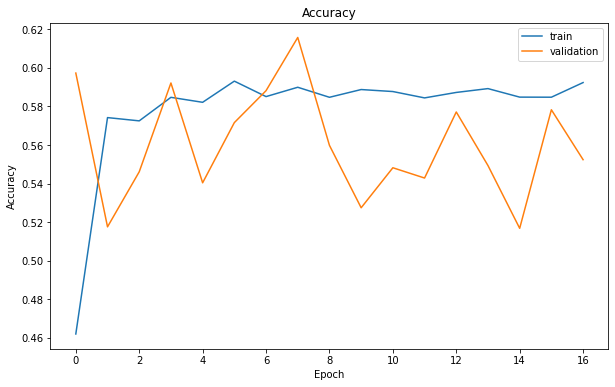

In [595]:
plt.title('Accuracy')
plt.plot(gl_history.history['categorical_accuracy'], label='train')
plt.plot(gl_history.history['val_categorical_accuracy'], label='validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [596]:
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix

In [597]:
gl_preds = gl_model.predict(X_test)

In [598]:
gl_preds.round()[45]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [599]:
y_test[45]

array([1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [600]:
# gl_preds = np.argmax(gl_preds, axis=1)
print('Hamming loss is ', hamming_loss(y_test, gl_preds.round()))
gl_report = classification_report(y_test, gl_preds.round())
print(gl_report)

Hamming loss is  0.04245714285714286
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     12617
           1       0.89      0.93      0.91      6802
           2       0.92      0.85      0.88      4978
           3       0.91      0.94      0.92      6725
           4       0.92      0.90      0.91      4902
           5       0.95      0.95      0.95      4511
           6       0.96      0.93      0.94      4540

   micro avg       0.93      0.92      0.93     45075
   macro avg       0.93      0.92      0.92     45075
weighted avg       0.93      0.92      0.93     45075
 samples avg       0.93      0.93      0.92     45075



C:\Users\Asad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Multilabel Classification Using Word2Vec

In [601]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=333)

In [602]:
import gensim

In [603]:
word2vec_model = gensim.models.Word2Vec(X_train, vector_size = 100,window=5, min_count=15, workers=10)

word2vec_weights = word2vec_model.wv.vectors
vocab_len, embedding_dim = word2vec_weights.shape

In [604]:
#save model
filename = 'word2vec.steam.review.txt'
word2vec_model.wv.save_word2vec_format(filename, binary=False)

In [605]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_len = len(tokenizer.word_index) + 1

maxlen = 250

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [606]:
embedding_dict = dict()
embedding_dim = 100

word2vec_input_file = open('word2vec.steam.review.txt', encoding="utf8")

for item in word2vec_input_file:
    items = item.split()
    word = items[0]
    coeff = asarray(items[1:], dtype='float32')
    embedding_dict[word] = coeff
word2vec_input_file.close()

embedding_matrix = zeros((vocab_len, embedding_dim))
for word, index in tokenizer.word_index.items():
    embedding_vec = embedding_dict.get(word)
    if embedding_vec is not None:
        embedding_matrix[index] = embedding_vec

In [607]:
w2v_model = Sequential()
w2v_model.add(Embedding(vocab_len, embedding_dim, weights=[embedding_matrix], input_length=X_train.shape[1]))
w2v_model.add(SpatialDropout1D(0.2))
w2v_model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
w2v_model.add(BatchNormalization())
w2v_model.add(Dropout(0.2))
w2v_model.add(Dense(7, activation='sigmoid'))
w2v_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["categorical_accuracy"])

epochs = 50
batch_size = 128

w2v_history = w2v_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])

Epoch 1/50
370/370 [==============================] - 516s 1s/step - loss: 0.4479 - categorical_accuracy: 0.4549 - val_loss: 0.2309 - val_categorical_accuracy: 0.6981
Epoch 2/50
370/370 [==============================] - 493s 1s/step - loss: 0.1704 - categorical_accuracy: 0.5560 - val_loss: 0.1630 - val_categorical_accuracy: 0.5408
Epoch 3/50
370/370 [==============================] - 500s 1s/step - loss: 0.1343 - categorical_accuracy: 0.5433 - val_loss: 0.1589 - val_categorical_accuracy: 0.5244
Epoch 4/50
370/370 [==============================] - 489s 1s/step - loss: 0.1160 - categorical_accuracy: 0.5646 - val_loss: 0.1429 - val_categorical_accuracy: 0.5446
Epoch 5/50
370/370 [==============================] - 474s 1s/step - loss: 0.1045 - categorical_accuracy: 0.5535 - val_loss: 0.1302 - val_categorical_accuracy: 0.5419
Epoch 6/50
370/370 [==============================] - 473s 1s/step - loss: 0.0951 - categorical_accuracy: 0.5654 - val_loss: 0.1310 - val_categorical_accuracy: 0.579

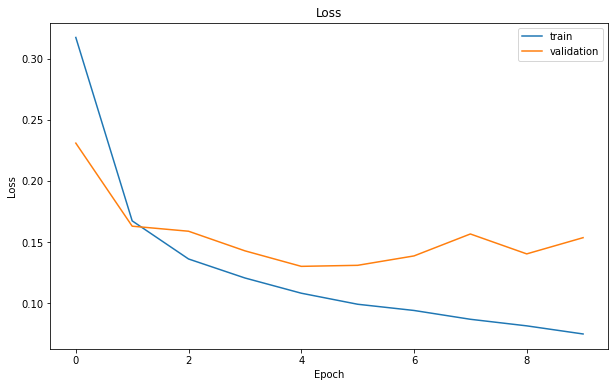

In [608]:
plt.title('Loss')
plt.plot(w2v_history.history['loss'], label='train')
plt.plot(w2v_history.history['val_loss'], label='validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

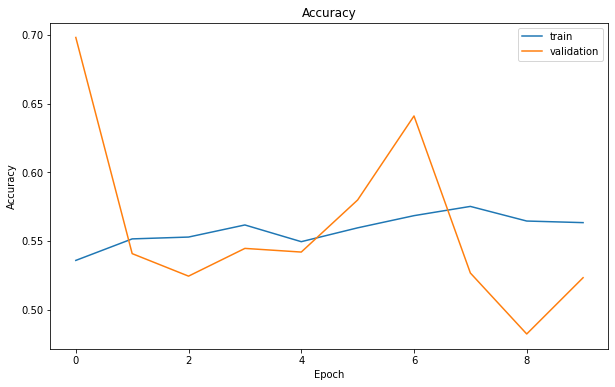

In [609]:
plt.title('Accuracy')
plt.plot(w2v_history.history['categorical_accuracy'], label='train')
plt.plot(w2v_history.history['val_categorical_accuracy'], label='validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [610]:
w2v_preds = w2v_model.predict(X_test)

In [611]:
print('Hamming loss is ', hamming_loss(y_test, w2v_preds.round()))
w2v_report = classification_report(y_test, w2v_preds.round())
print(w2v_report)

Hamming loss is  0.05370793650793651
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     12617
           1       0.93      0.81      0.87      6802
           2       0.90      0.81      0.85      4978
           3       0.92      0.91      0.91      6725
           4       0.88      0.90      0.89      4902
           5       0.94      0.93      0.93      4511
           6       0.96      0.88      0.92      4540

   micro avg       0.93      0.88      0.90     45075
   macro avg       0.92      0.88      0.90     45075
weighted avg       0.93      0.88      0.90     45075
 samples avg       0.91      0.89      0.89     45075



C:\Users\Asad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Multilabel Classification Using TFIDF

In [612]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=333)

In [613]:
word_counts = {}
for review in X_train:
    for word in review.split():
        if word not in word_counts:
            word_counts[word] = 1
        word_counts[word] += 1

In [614]:
# sort and filter top 10000 words
dict_size = 10000
pop_words = sorted(word_counts, key=word_counts.get, reverse=True)[:dict_size]
word_idx = {key: rank for rank, key in enumerate(pop_words, 0)}
idx_words = {index: word for word, index in word_idx.items()}
corpus = word_idx.keys()

In [615]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [616]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=dict_size)

#vectorizer.fit(corpus)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

tdif_vocab = vectorizer.vocabulary_


In [617]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

In [618]:
svmClassifier = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
clf = svmClassifier.fit(X_train, y_train)

In [619]:
svm_preds = svmClassifier.predict(X_test)

In [620]:
print('Hamming loss is ', hamming_loss(y_test, svm_preds))
svm_report = classification_report(y_test, svm_preds)
print(svm_report)

Hamming loss is  0.04607619047619048
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     12617
           1       0.92      0.89      0.90      6802
           2       0.91      0.82      0.86      4978
           3       0.94      0.90      0.92      6725
           4       0.93      0.87      0.90      4902
           5       0.97      0.92      0.94      4511
           6       0.97      0.92      0.94      4540

   micro avg       0.94      0.90      0.92     45075
   macro avg       0.94      0.89      0.92     45075
weighted avg       0.94      0.90      0.92     45075
 samples avg       0.92      0.90      0.90     45075



C:\Users\Asad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Sentiment Analysis

In [621]:
X = []
reviews = list(data_sa["review_text"])
for sentence in reviews:
    X.append(preprocess(sentence))
y = data_sa["review_score"].values

## Sentiment Analysis Base Model

In [622]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=333)

In [623]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_len = len(tokenizer.word_index) + 1

maxlen = 250
embedding_dim = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [624]:
sb_model = Sequential()
sb_model.add(Embedding(vocab_len, embedding_dim, input_length=X_train.shape[1]))
sb_model.add(SpatialDropout1D(0.2))
sb_model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
sb_model.add(BatchNormalization())
sb_model.add(Dropout(0.2))
sb_model.add(Dense(1, activation='sigmoid'))
sb_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["acc"])

epochs = 50
batch_size = 128

sb_history = sb_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])

Epoch 1/50
370/370 [==============================] - 549s 1s/step - loss: 0.5088 - acc: 0.7376 - val_loss: 0.3979 - val_acc: 0.8312
Epoch 2/50
370/370 [==============================] - 529s 1s/step - loss: 0.3182 - acc: 0.8684 - val_loss: 0.4209 - val_acc: 0.8320
Epoch 3/50
370/370 [==============================] - 522s 1s/step - loss: 0.2833 - acc: 0.8860 - val_loss: 0.4046 - val_acc: 0.8472
Epoch 4/50
370/370 [==============================] - 523s 1s/step - loss: 0.2565 - acc: 0.8959 - val_loss: 0.4245 - val_acc: 0.8410
Epoch 5/50
370/370 [==============================] - 520s 1s/step - loss: 0.2626 - acc: 0.8914 - val_loss: 0.4201 - val_acc: 0.8406
Epoch 6/50
370/370 [==============================] - 521s 1s/step - loss: 0.2150 - acc: 0.9160 - val_loss: 0.4824 - val_acc: 0.8364


In [625]:
sb_model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 250, 100)          8626900   
_________________________________________________________________
spatial_dropout1d_24 (Spatia (None, 250, 100)          0         
_________________________________________________________________
bidirectional_24 (Bidirectio (None, 128)               84480     
_________________________________________________________________
batch_normalization_24 (Batc (None, 128)               512       
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 129       
Total params: 8,712,021
Trainable params: 8,711,765
Non-trainable params: 256
_________________________________________

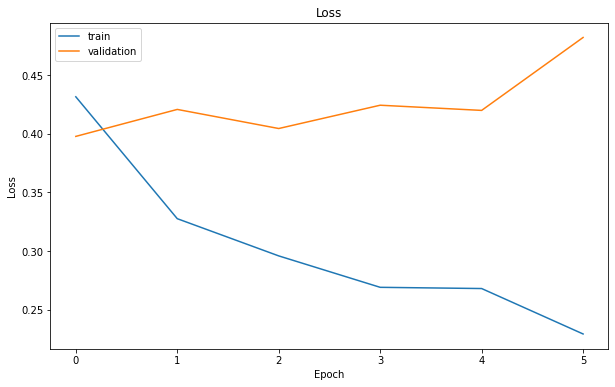

In [626]:
plt.title('Loss')
plt.plot(sb_history.history['loss'], label='train')
plt.plot(sb_history.history['val_loss'], label='validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

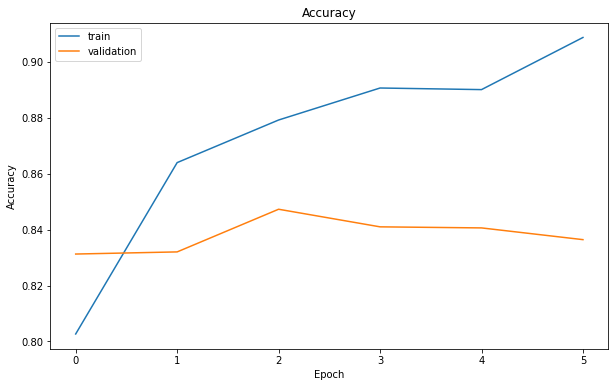

In [627]:
plt.title('Accuracy')
plt.plot(sb_history.history['acc'], label='train')
plt.plot(sb_history.history['val_acc'], label='validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [628]:
sb_preds = sb_model.predict(X_test)

In [629]:
sb_preds

array([[0.9986285 ],
       [0.35580617],
       [0.94802487],
       ...,
       [0.21741048],
       [0.3026722 ],
       [0.99662733]], dtype=float32)

In [630]:
y_test[1]

0

In [631]:
print('Test accuracy is ',accuracy_score(y_test, sb_preds.round()))
sb_report = classification_report(y_test, sb_preds.round())
print(sb_report)

Test accuracy is  0.8416
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     11180
           1       0.87      0.81      0.84     11320

    accuracy                           0.84     22500
   macro avg       0.84      0.84      0.84     22500
weighted avg       0.84      0.84      0.84     22500



## Sentiment Analysis Using GloVe

In [632]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=333)

In [633]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_len = len(tokenizer.word_index) + 1

maxlen = 250

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [634]:
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(52500, 250) (52500,)
(22500, 250) (22500,)


In [635]:
embedding_dict = dict()
embedding_dim = 100

glove_input_file = open('glove.twitter.27B.100d.txt', encoding="utf8")

for item in glove_input_file:
    items = item.split(' ')
    word = items[0]
    coeff = asarray(items[1:], dtype='float32')
    embedding_dict[word] = coeff
glove_input_file.close()

embedding_matrix = zeros((vocab_len, embedding_dim))
for word, index in tokenizer.word_index.items():
    embedding_vec = embedding_dict.get(word)
    if embedding_vec is not None:
        embedding_matrix[index] = embedding_vec

In [636]:
y_train.shape

(52500,)

In [637]:
sgl_model = Sequential()
sgl_model.add(Embedding(vocab_len, embedding_dim, weights=[embedding_matrix], input_length=X_train.shape[1]))
sgl_model.add(SpatialDropout1D(0.2))
sgl_model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
sgl_model.add(BatchNormalization())
sgl_model.add(Dropout(0.2))
sgl_model.add(Dense(1, activation='sigmoid'))
sgl_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["acc"])

epochs = 50
batch_size = 128

sgl_history = sgl_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])

Epoch 1/50
370/370 [==============================] - 495s 1s/step - loss: 0.6112 - acc: 0.6875 - val_loss: 0.4235 - val_acc: 0.8173
Epoch 2/50
370/370 [==============================] - 474s 1s/step - loss: 0.4143 - acc: 0.8153 - val_loss: 0.3678 - val_acc: 0.8451
Epoch 3/50
370/370 [==============================] - 467s 1s/step - loss: 0.3539 - acc: 0.8480 - val_loss: 0.3665 - val_acc: 0.8526
Epoch 4/50
370/370 [==============================] - 461s 1s/step - loss: 0.3284 - acc: 0.8607 - val_loss: 0.3528 - val_acc: 0.8577
Epoch 5/50
370/370 [==============================] - 462s 1s/step - loss: 0.3067 - acc: 0.8693 - val_loss: 0.3401 - val_acc: 0.8575
Epoch 6/50
370/370 [==============================] - 465s 1s/step - loss: 0.2857 - acc: 0.8799 - val_loss: 0.3433 - val_acc: 0.8562
Epoch 7/50
370/370 [==============================] - 458s 1s/step - loss: 0.2749 - acc: 0.8869 - val_loss: 0.3475 - val_acc: 0.8600
Epoch 8/50
370/370 [==============================] - 463s 1s/step - 

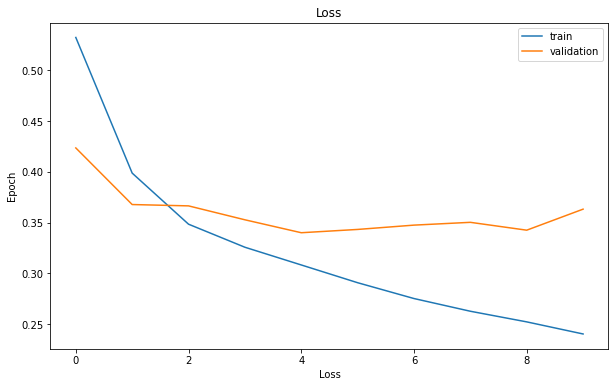

In [638]:
plt.title('Loss')
plt.plot(sgl_history.history['loss'], label='train')
plt.plot(sgl_history.history['val_loss'], label='validation')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend()
plt.show()

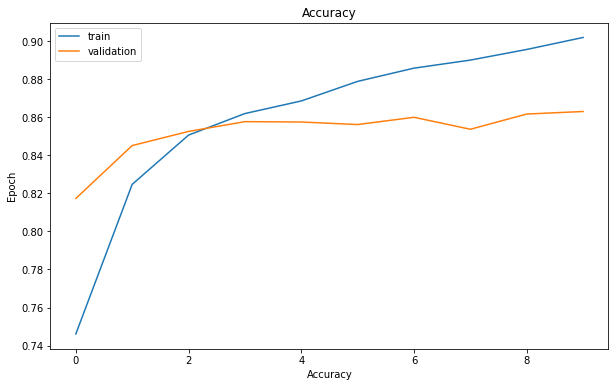

In [639]:
plt.title('Accuracy')
plt.plot(sgl_history.history['acc'], label='train')
plt.plot(sgl_history.history['val_acc'], label='validation')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.legend()
plt.show()

In [640]:
sgl_preds = sgl_model.predict(X_test)

In [641]:
print('Test accuracy is ', accuracy_score(y_test, sgl_preds.round()))
sgl_report = classification_report(y_test, sgl_preds.round())
print(sgl_report)

Test accuracy is  0.8643555555555555
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     11180
           1       0.86      0.87      0.87     11320

    accuracy                           0.86     22500
   macro avg       0.86      0.86      0.86     22500
weighted avg       0.86      0.86      0.86     22500



## Sentiment Analysis Using Word2Vec

In [642]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=333)

In [643]:
word2vec_model = gensim.models.Word2Vec(X_train, vector_size=100, window=5, min_count=15, workers=10)

word2vec_weights = word2vec_model.wv.vectors
vocab_len, embedding_dim = word2vec_weights.shape

In [644]:
# save model
filename = 'word2vec.steam.review.txt'
word2vec_model.wv.save_word2vec_format(filename, binary=False)

In [645]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_len = len(tokenizer.word_index) + 1

maxlen = 250

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [646]:
embedding_dict = dict()
embedding_dim = 100

word2vec_input_file = open('word2vec.steam.review.txt', encoding="utf8")

for item in word2vec_input_file:
    items = item.split()
    word = items[0]
    coeffs = asarray(items[1:], dtype='float32')
    embedding_dict[word] = coeffs
word2vec_input_file.close()

embedding_matrix = zeros((vocab_len, embedding_dim))
for word, index in tokenizer.word_index.items():
    embedding_vec = embedding_dict.get(word)
    if embedding_vec is not None:
        embedding_matrix[index] = embedding_vec

In [647]:
sw2v_model = Sequential()
sw2v_model.add(Embedding(vocab_len, embedding_dim, weights=[embedding_matrix], input_length=X_train.shape[1]))
sw2v_model.add(SpatialDropout1D(0.2))
sw2v_model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
sw2v_model.add(BatchNormalization())
sw2v_model.add(Dropout(0.2))
sw2v_model.add(Dense(1, activation='sigmoid'))
sw2v_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["acc"])

epochs = 50
batch_size = 128

sw2v_history = sw2v_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])

Epoch 1/50
370/370 [==============================] - 528s 1s/step - loss: 0.4846 - acc: 0.7599 - val_loss: 0.4162 - val_acc: 0.8366
Epoch 2/50
370/370 [==============================] - 507s 1s/step - loss: 0.2967 - acc: 0.8790 - val_loss: 0.3700 - val_acc: 0.8371
Epoch 3/50
370/370 [==============================] - 507s 1s/step - loss: 0.2403 - acc: 0.9044 - val_loss: 0.3952 - val_acc: 0.8408
Epoch 4/50
370/370 [==============================] - 507s 1s/step - loss: 0.2192 - acc: 0.9142 - val_loss: 0.4115 - val_acc: 0.8291
Epoch 5/50
370/370 [==============================] - 518s 1s/step - loss: 0.1881 - acc: 0.9296 - val_loss: 0.5163 - val_acc: 0.8356
Epoch 6/50
370/370 [==============================] - 510s 1s/step - loss: 0.1562 - acc: 0.9396 - val_loss: 0.4917 - val_acc: 0.8269
Epoch 7/50
370/370 [==============================] - 506s 1s/step - loss: 0.1366 - acc: 0.9485 - val_loss: 0.5572 - val_acc: 0.8286


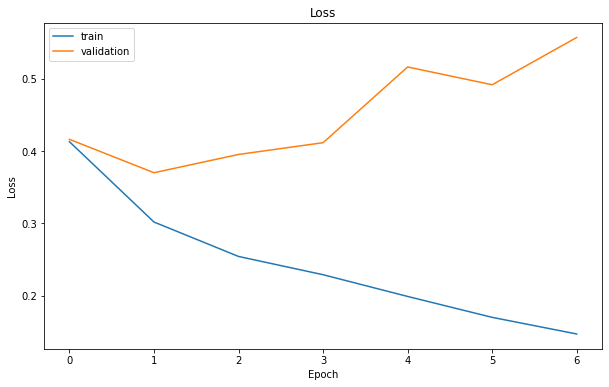

In [648]:
plt.title('Loss')
plt.plot(sw2v_history.history['loss'], label='train')
plt.plot(sw2v_history.history['val_loss'], label='validation')
plt.ylabel('Loss')
plt.xlabel("Epoch")
plt.legend()
plt.show()

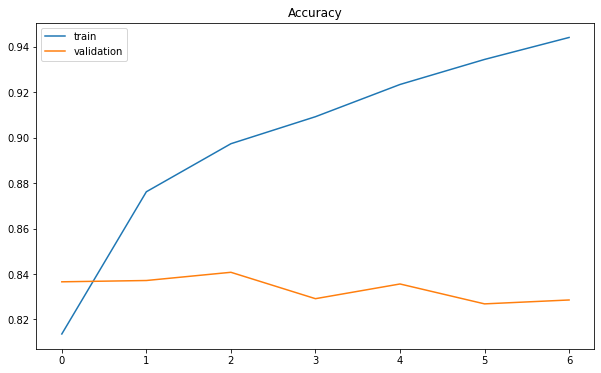

In [649]:
plt.title('Accuracy')
plt.plot(sw2v_history.history['acc'], label='train')
plt.plot(sw2v_history.history['val_acc'], label='validation')
plt.legend()
plt.show()

In [650]:
sw2v_preds = sw2v_model.predict(X_test)

In [651]:
sw2v_preds[0]

array([0.9963342], dtype=float32)

In [652]:
y_test[0]

1

In [653]:
print('Test accuracy is ', accuracy_score(y_test, sw2v_preds.round()))
sw2v_report = classification_report(y_test, sw2v_preds.round())
print(sw2v_report)

Test accuracy is  0.8286666666666667
              precision    recall  f1-score   support

           0       0.81      0.86      0.83     11180
           1       0.85      0.80      0.82     11320

    accuracy                           0.83     22500
   macro avg       0.83      0.83      0.83     22500
weighted avg       0.83      0.83      0.83     22500



## Sentiment Analysis Using TFIDF

In [654]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=333)

In [655]:
word_counts = {}
for review in X_train:
    for word in review.split():
        if word not in word_counts:
            word_counts[word] = 1
        word_counts[word] += 1

In [656]:
# sort and filter top 10000 words
dict_size = 10000
pop_words = sorted(word_counts, key=word_counts.get, reverse=True)[:dict_size]
word_idx = {key: rank for rank, key in enumerate(pop_words, 0)}
idx_words = {index: word for word, index in word_idx.items()}
corpus = word_idx.keys()

In [657]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=dict_size)

#vectorizer.fit(corpus)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

tdif_vocab = vectorizer.vocabulary_


In [658]:
from sklearn import svm

In [659]:
svmClassifier = svm.SVC(kernel='linear', verbose=True)
svmClassifier.fit(X_train, y_train)

[LibSVM]

SVC(kernel='linear', verbose=True)

In [660]:
ssvm_preds = svmClassifier.predict(X_test)

In [661]:
print('Test accuracy is ', accuracy_score(y_test, ssvm_preds))
ssvm_report = classification_report(y_test, ssvm_preds)
print(ssvm_report)

Test accuracy is  0.8636444444444444
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     11180
           1       0.87      0.86      0.86     11320

    accuracy                           0.86     22500
   macro avg       0.86      0.86      0.86     22500
weighted avg       0.86      0.86      0.86     22500

